In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
import xgboost as xgb

In [10]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
from sklearn.metrics import classification_report

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("Admission_Predict.csv")


In [18]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [19]:
df=df.drop('Serial No.',axis=1)


In [20]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [22]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [23]:
df.shape

(400, 8)

In [24]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

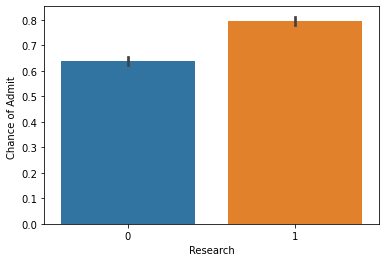

In [26]:
sns.barplot(x=df['Research'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

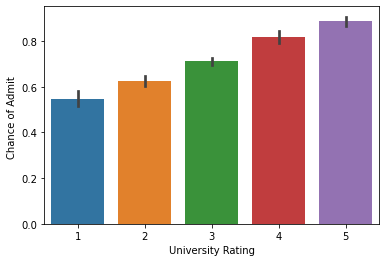

In [27]:
sns.barplot(x=df['University Rating'],y=df['Chance of Admit '])

In [28]:
df['Chance of Admit_Range']=pd.qcut(df['Chance of Admit '],4)


In [29]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit_Range
0,337,118,4,4.5,4.5,9.65,1,0.92,"(0.83, 0.97]"
1,324,107,4,4.0,4.5,8.87,1,0.76,"(0.73, 0.83]"
2,316,104,3,3.0,3.5,8.00,1,0.72,"(0.64, 0.73]"
3,322,110,3,3.5,2.5,8.67,1,0.80,"(0.73, 0.83]"
4,314,103,2,2.0,3.0,8.21,0,0.65,"(0.64, 0.73]"
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,"(0.73, 0.83]"
396,325,107,3,3.0,3.5,9.11,1,0.84,"(0.83, 0.97]"
397,330,116,4,5.0,4.5,9.45,1,0.91,"(0.83, 0.97]"
398,312,103,3,3.5,4.0,8.78,0,0.67,"(0.64, 0.73]"


<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

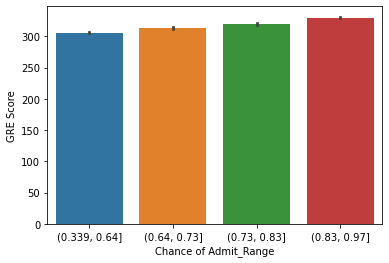

In [30]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['GRE Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

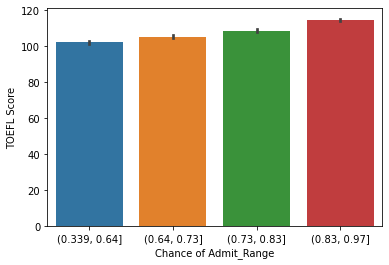

In [31]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

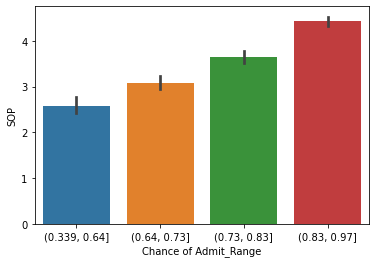

In [32]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['SOP'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

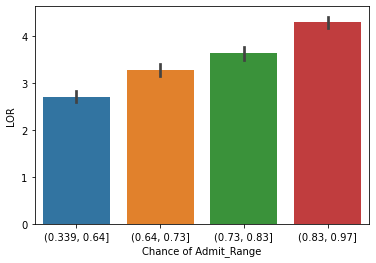

In [33]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['LOR '])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

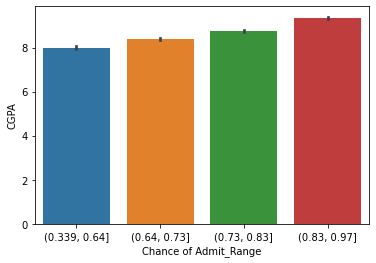

In [34]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['CGPA'])

In [35]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit_Range
0,337,118,4,4.5,4.5,9.65,1,0.92,"(0.83, 0.97]"
1,324,107,4,4.0,4.5,8.87,1,0.76,"(0.73, 0.83]"
2,316,104,3,3.0,3.5,8.00,1,0.72,"(0.64, 0.73]"
3,322,110,3,3.5,2.5,8.67,1,0.80,"(0.73, 0.83]"
4,314,103,2,2.0,3.0,8.21,0,0.65,"(0.64, 0.73]"
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,"(0.73, 0.83]"
396,325,107,3,3.0,3.5,9.11,1,0.84,"(0.83, 0.97]"
397,330,116,4,5.0,4.5,9.45,1,0.91,"(0.83, 0.97]"
398,312,103,3,3.5,4.0,8.78,0,0.67,"(0.64, 0.73]"


<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

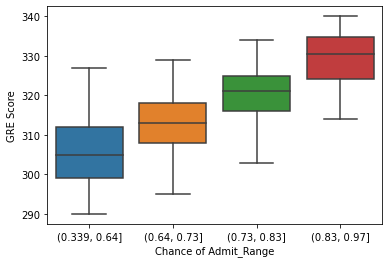

In [36]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['GRE Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

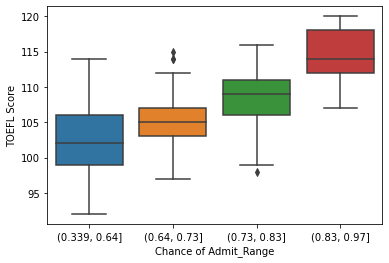

In [37]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

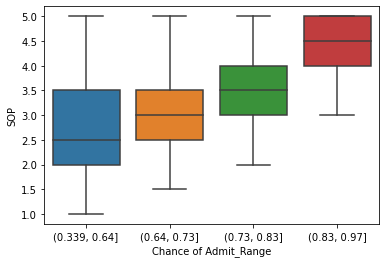

In [38]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['SOP'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

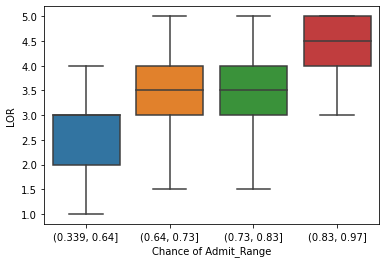

In [39]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['LOR '])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

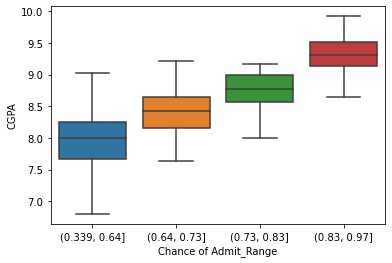

In [40]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['CGPA'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

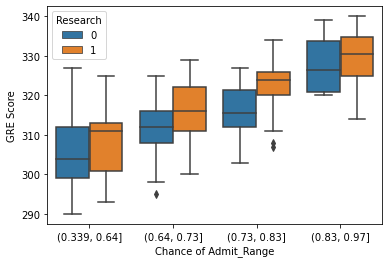

In [41]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['GRE Score'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

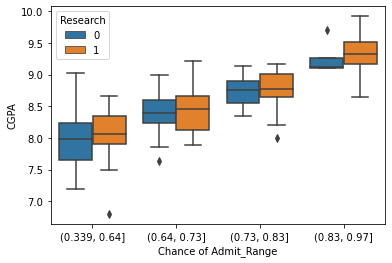

In [42]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['CGPA'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

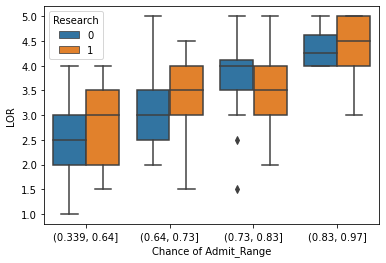

In [43]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['LOR '],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

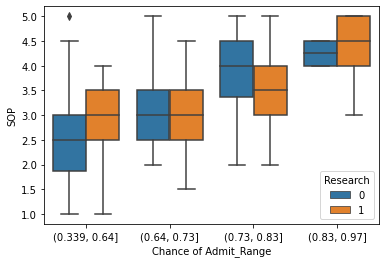

In [44]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['SOP'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

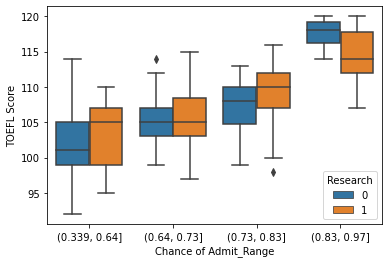

In [45]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'],hue=df['Research'])

In [46]:
df=df.drop('Chance of Admit_Range',axis=1)


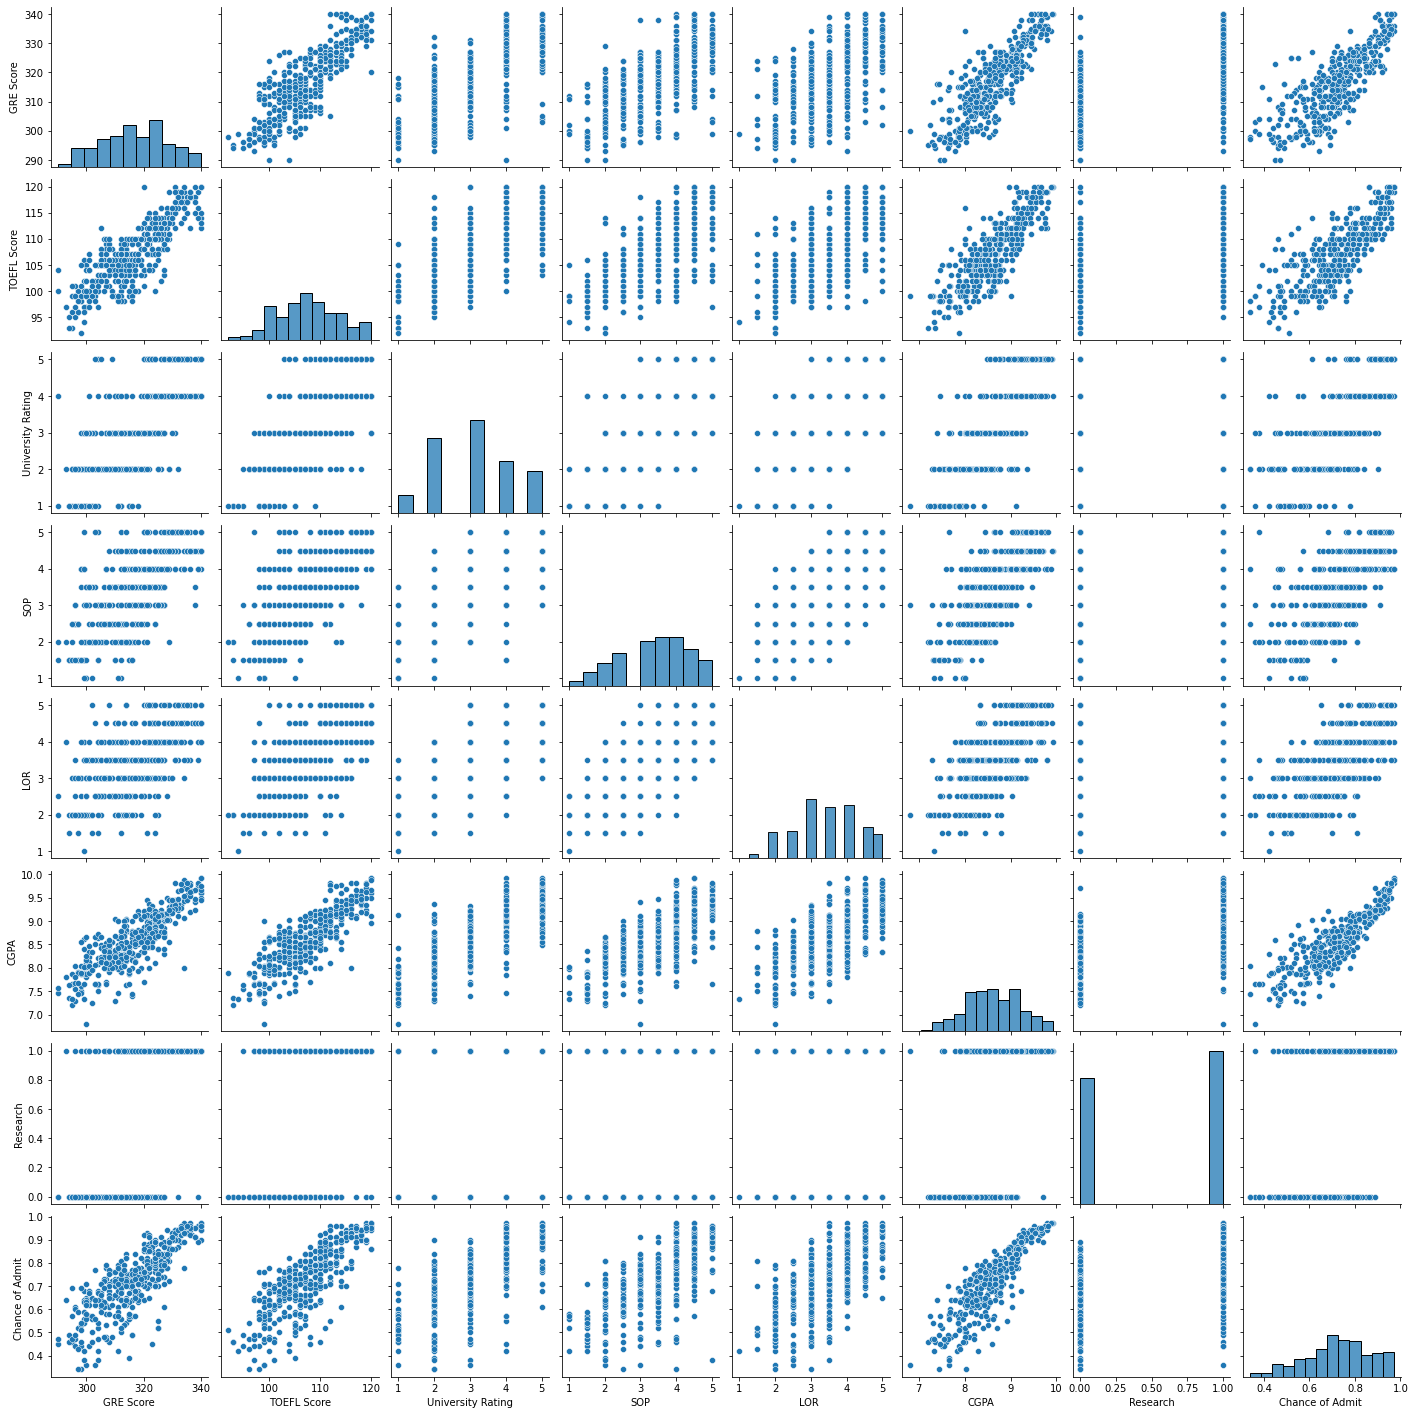

In [47]:
sns.pairplot(df)

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

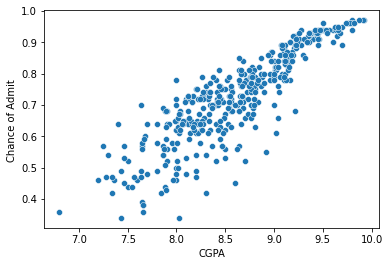

In [48]:
sns.scatterplot(x=df['CGPA'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

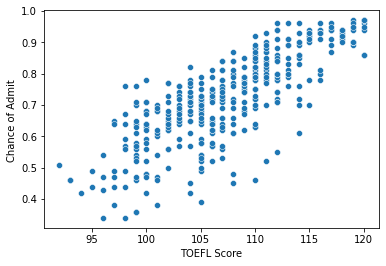

In [49]:
sns.scatterplot(x=df['TOEFL Score'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

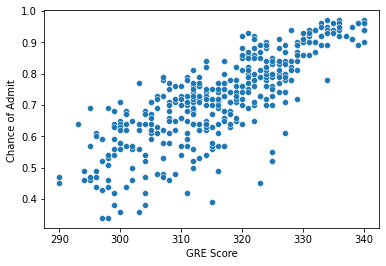

In [50]:

sns.scatterplot(x=df['GRE Score'],y=df['Chance of Admit '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

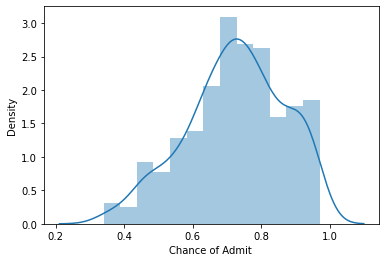

In [51]:
sns.distplot(df['Chance of Admit '])

<AxesSubplot:>

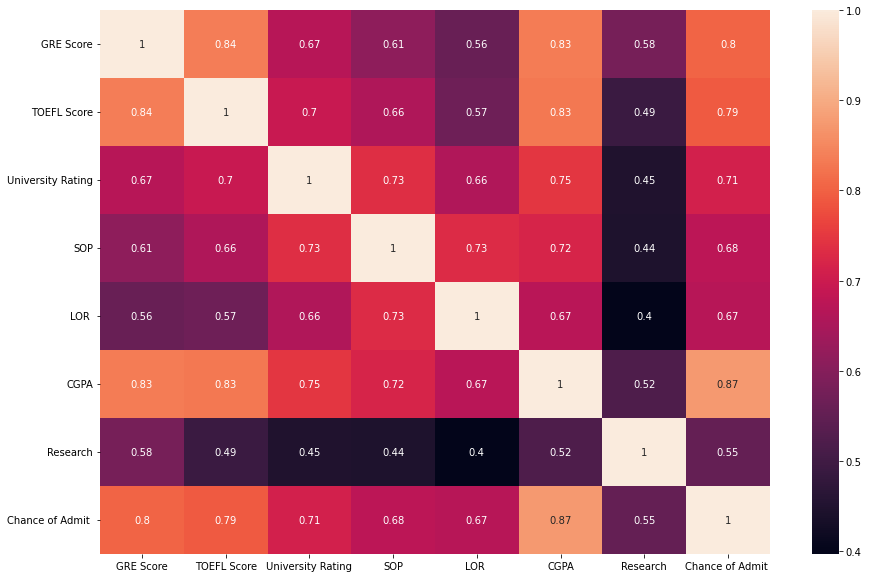

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [53]:
X=df.drop('Chance of Admit ',axis=1)

In [54]:
y=df['Chance of Admit ']

In [55]:
sc=StandardScaler()


In [56]:
X=sc.fit_transform(X)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(7,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])

In [59]:
model.compile(optimizer='adam',
    loss="mse")

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                120       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [61]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.1235 - val_loss: 0.1031
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0939 - val_loss: 0.0852
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0698 - val_loss: 0.0637
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0561 - val_loss: 0.0545
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0501
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0392 - val_loss: 0.0462
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.0400
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.0363
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0286 - val_loss: 0.0349
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0321
Epoch 11/100
8/8 [==========

In [62]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [63]:
r2_score(y_test,y_pred)

0.7485150753028537

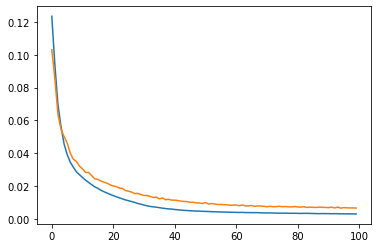

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# RandomForestRegressor

In [65]:
rfr=RandomForestRegressor()


In [66]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
y_pred=rfr.predict(X_train)

In [68]:
r2_score(y_train,y_pred)

0.9627358346976909

In [69]:
y_pred=rfr.predict(X_test)

In [70]:
r2_score(y_test,y_pred)

0.8059256910682249

In [71]:
mean_squared_error(y_test,y_pred)

0.005011650625

In [72]:
kf=KFold(5)


In [73]:
scores=cross_val_score(rfr,X_test,y_test,cv=kf)

In [74]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6876012170559251
1 0.8540142284899856
2 0.8006749427805719
3 0.7881970259933881
4 0.8837422469823575


In [75]:
scores.mean()

0.8028459322604456

# KNeighborsRegressor

In [76]:
knc=KNeighborsRegressor()


In [77]:
knc.fit(X_train,y_train)

KNeighborsRegressor()

In [78]:
y_pred=knc.predict(X_train)

In [79]:
r2_score(y_train,y_pred)

0.8306822294116367

In [80]:
y_pred=knc.predict(X_test)

In [81]:
r2_score(y_test,y_pred)

0.7553997561558545

In [82]:
mean_squared_error(y_test,y_pred)

0.006316399999999998

In [83]:
kf=KFold(5)


In [84]:
scores=cross_val_score(knc,X_test,y_test,cv=kf)

In [85]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7212701949860725
1 0.7979998499737453
2 0.8284285686339719
3 0.7333713618979709
4 0.6737604456824511


In [86]:
scores.mean()

0.7509660842348423

# LinearRegression

In [87]:
lr=LinearRegression()


In [88]:
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred=lr.predict(X_train)

In [90]:
r2_score(y_train,y_pred)

0.7951946003191085

In [91]:
y_pred=lr.predict(X_test)

In [92]:
r2_score(y_test,y_pred)

0.8212082591486991

In [93]:
mean_squared_error(y_test,y_pred)

0.004617003377285012

In [94]:
kf=KFold(5)


In [95]:
scores=cross_val_score(lr,X_test,y_test,cv=kf)

In [96]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7224804126651247
1 0.8580707616598803
2 0.8069504573922819
3 0.8778926708009797
4 0.8221216616012933


In [97]:
scores.mean()

0.817503192823912

# XGBClassifier

In [98]:
xgb_i=xgb.XGBRegressor()

In [99]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
y_pred=xgb_i.predict(X_train)

In [101]:
r2_score(y_train,y_pred)

0.9997879946100555

In [102]:
y_pred=xgb_i.predict(X_test)

In [103]:
r2_score(y_test,y_pred)

0.7753848428474301

In [104]:
mean_squared_error(y_test,y_pred)

0.005800317924222914

In [105]:
kf=KFold(5)


In [106]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=kf)

In [107]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6687330546087114
1 0.800430839454692
2 0.8180913716301073
3 0.8441069464677281
4 0.8601595153570898


In [108]:
scores.mean()

0.7983043455036658